## PyBEAM Tutorial 5: Fixing model parameters.

In this tutorial, we demonstrate how to input a fixed parameter into a model instead of a prior.

First, as before, import PyBEAM's default module.


In [1]:
# import PyBEAM's default module
import pybeam.default as pbd


For this example, we define a base model with a uniform contamination. This gives us the following model dictionary.


In [2]:
# define base model
model = {'type' : 'base',  # model type ('base' or 'ugm')
        'sigma' : 1.0,     # sets sigma, the scaling parameter
    'threshold' : 'fixed', # sets threshold type (fixed, linear, exponential, or weibull)
      'leakage' : False,   # if True, drift rate has leaky integration
        'delay' : False,   # if True, decision threshold motion is delayed
'contamination' : True}    # if True, uniform contamination added to model

# outputs parameters used by your model
pbd.parse_model(model)


['t_nd', 'w', 'mu', 'a', 'g', 'gl', 'gu']

We now simulate a data set.


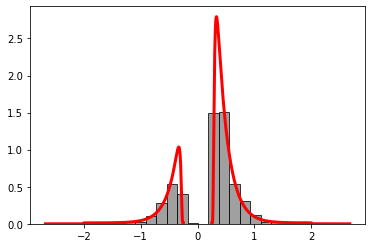

In [3]:
# parameters for synthetic data
phi = {'t_nd' : 0.25, # non-decision time
          'w' : 0.5,  # relative start point
         'mu' : 1.0,  # drift rate
          'a' : 0.5,  # decision threshold location
          'g' : 0.05, # contamination strength
         'gl' : 0.0,  # contamination model lower bound
         'gu' : 2.0}  # contamination model upper bound

# generate synthetic data
rt = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                         model = model, # dictionary containing model information
                           phi = phi)   # parameters used to simulate data

# plot data and model likelihood function
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi,   # parameters used for model rt distribution
               rt = rt);   # dictionary of simulated rt data


We now prepare to call the parameter inference function. We first build our dictionary of priors. However, let's say that we want to fix 'gl' and 'gu' at single values instead of making them priors?

To accomplish this, instead of writing a prior in the prior dictionary, we simply put the constant we desire as the value. In this case, we want our contamination model to have bounds of 0.0 and 2.0, matching the generated data set; so, for those prior keys, we input those values.


In [4]:
# define priors
p = {'pt_nd' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # prior for non-decision time
        'pw' : 'Uniform("w", lower = 0.3, upper = 0.7)',     # prior for relative start
       'pmu' : 'Uniform("mu", lower = -5.0, upper = 5.0)',   # prior for drift rate
        'pa' : 'Uniform("a", lower = 0.25, upper = 2.0)',    # prior for threshold location
        'pg' : 'Uniform("g", lower = 0.0, upper = 0.75)',    # prior for contamination strength
        'gl' : 0.0,                                          # uniform contamination lower bound
        'gu' : 2.0}                                          # uniform contamination upper bound


We now proceed as normal to complete parameter inference.


In [5]:
# define model condition
c = {'rt' : rt,
   't_nd' : 'pt_nd',
      'w' : 'pw',
     'mu' : 'pmu',
      'a' : 'pa',
      'g' : 'pg',
     'gl' : 'gl',
     'gu' : 'gu'}

# load into condition dictionary
cond = {0 : c}

# run parameter inference
trace = pbd.inference(model = model,
                     priors = p,
                 conditions = cond,
                    samples = 25000,
                     chains = 3,
                      cores = 3,
                  file_name = 'tutorial5')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [g, a, mu, w, t_nd]


Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 59 seconds.


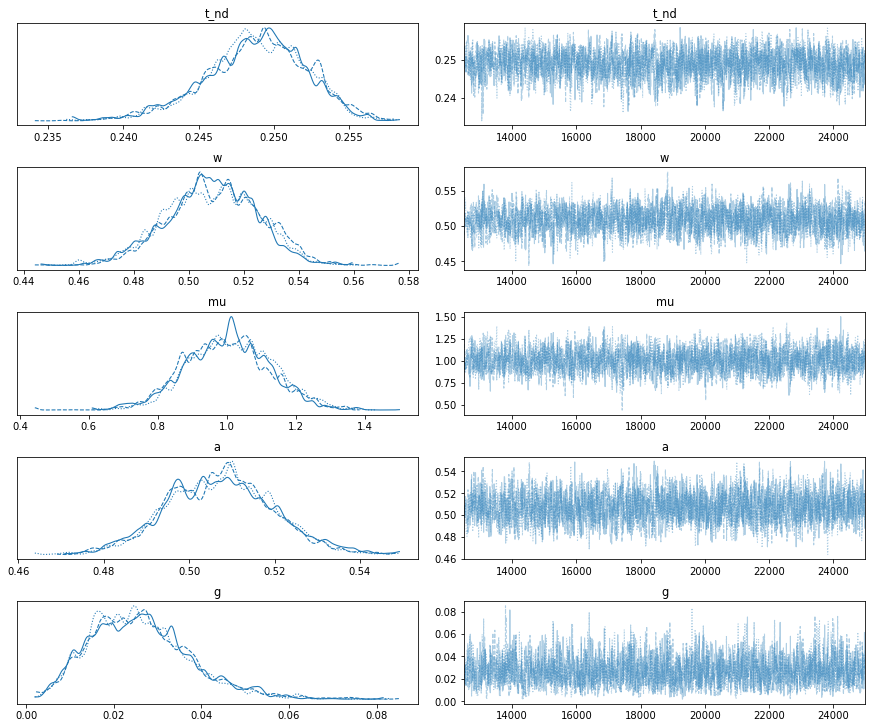

In [6]:
# plot posteriors
pbd.plot_trace(file_name = 'tutorial5', burnin = 12500);
